# Assignment #C: 图 (2/4)

Updated 2329 GMT+8 Nov 24, 2025

2025 fall, Complied by <mark>胡孝齐 物理学院</mark>





>**说明：**
>
>1. **解题与记录：**
>
>     对于每一个题目，请提供其解题思路（可选），并附上使用Python或C++编写的源代码（确保已在OpenJudge， Codeforces，LeetCode等平台上获得Accepted）。请将这些信息连同显示“Accepted”的截图一起填写到下方的作业模板中。（推荐使用Typora https://typoraio.cn 进行编辑，当然你也可以选择Word。）无论题目是否已通过，请标明每个题目大致花费的时间。
>
>2. **提交安排：**提交时，请首先上传PDF格式的文件，并将.md或.doc格式的文件作为附件上传至右侧的“作业评论”区。确保你的Canvas账户有一个清晰可见的本人头像，提交的文件为PDF格式，并且“作业评论”区包含上传的.md或.doc附件。
> 
>3. **延迟提交：**如果你预计无法在截止日期前提交作业，请提前告知具体原因。这有助于我们了解情况并可能为你提供适当的延期或其他帮助。  
>
>请按照上述指导认真准备和提交作业，以保证顺利完成课程要求。



## 1. 题目

### M909.蛇梯棋

bfs, https://leetcode.cn/problems/snakes-and-ladders/


思路：
bfs，但多了一步爬梯子，需要通过编号到坐标的映射判断有没有梯子。
我的方法是直接构建所有编号到坐标的映射，也可以用一个函数计算特定编号对应的坐标。


代码：

```python
class Solution:
    def snakesAndLadders(self, board: List[List[int]]) -> int:
        n=len(board)
        l=[]
        for i in range(n):
            if i%2==0:
                for j in range(n):
                    l.append((n-1-i,j))
            else:
                for j in range(n):
                    l.append((n-1-i,n-1-j))
        q=deque()
        q.append((0,0))
        history=[float('inf')]*n**2
        history[0]=0
        answer=-1
        while q:
            position,steps=q.popleft()
            if position==n**2-1:
                answer=steps
                break
            next_steps=[]
            for i in range(position+1,min(position+7,n**2)):
                next_steps.append(i)
            for next_step in next_steps:
                r,c=l[next_step]
                if board[r][c]!=-1:
                    next_step=board[r][c]-1
                if history[next_step]>steps+1:
                    q.append((next_step,steps+1))
                    history[next_step]=steps+1
        return answer
```



代码运行截图 <mark>（至少包含有"Accepted"）</mark>
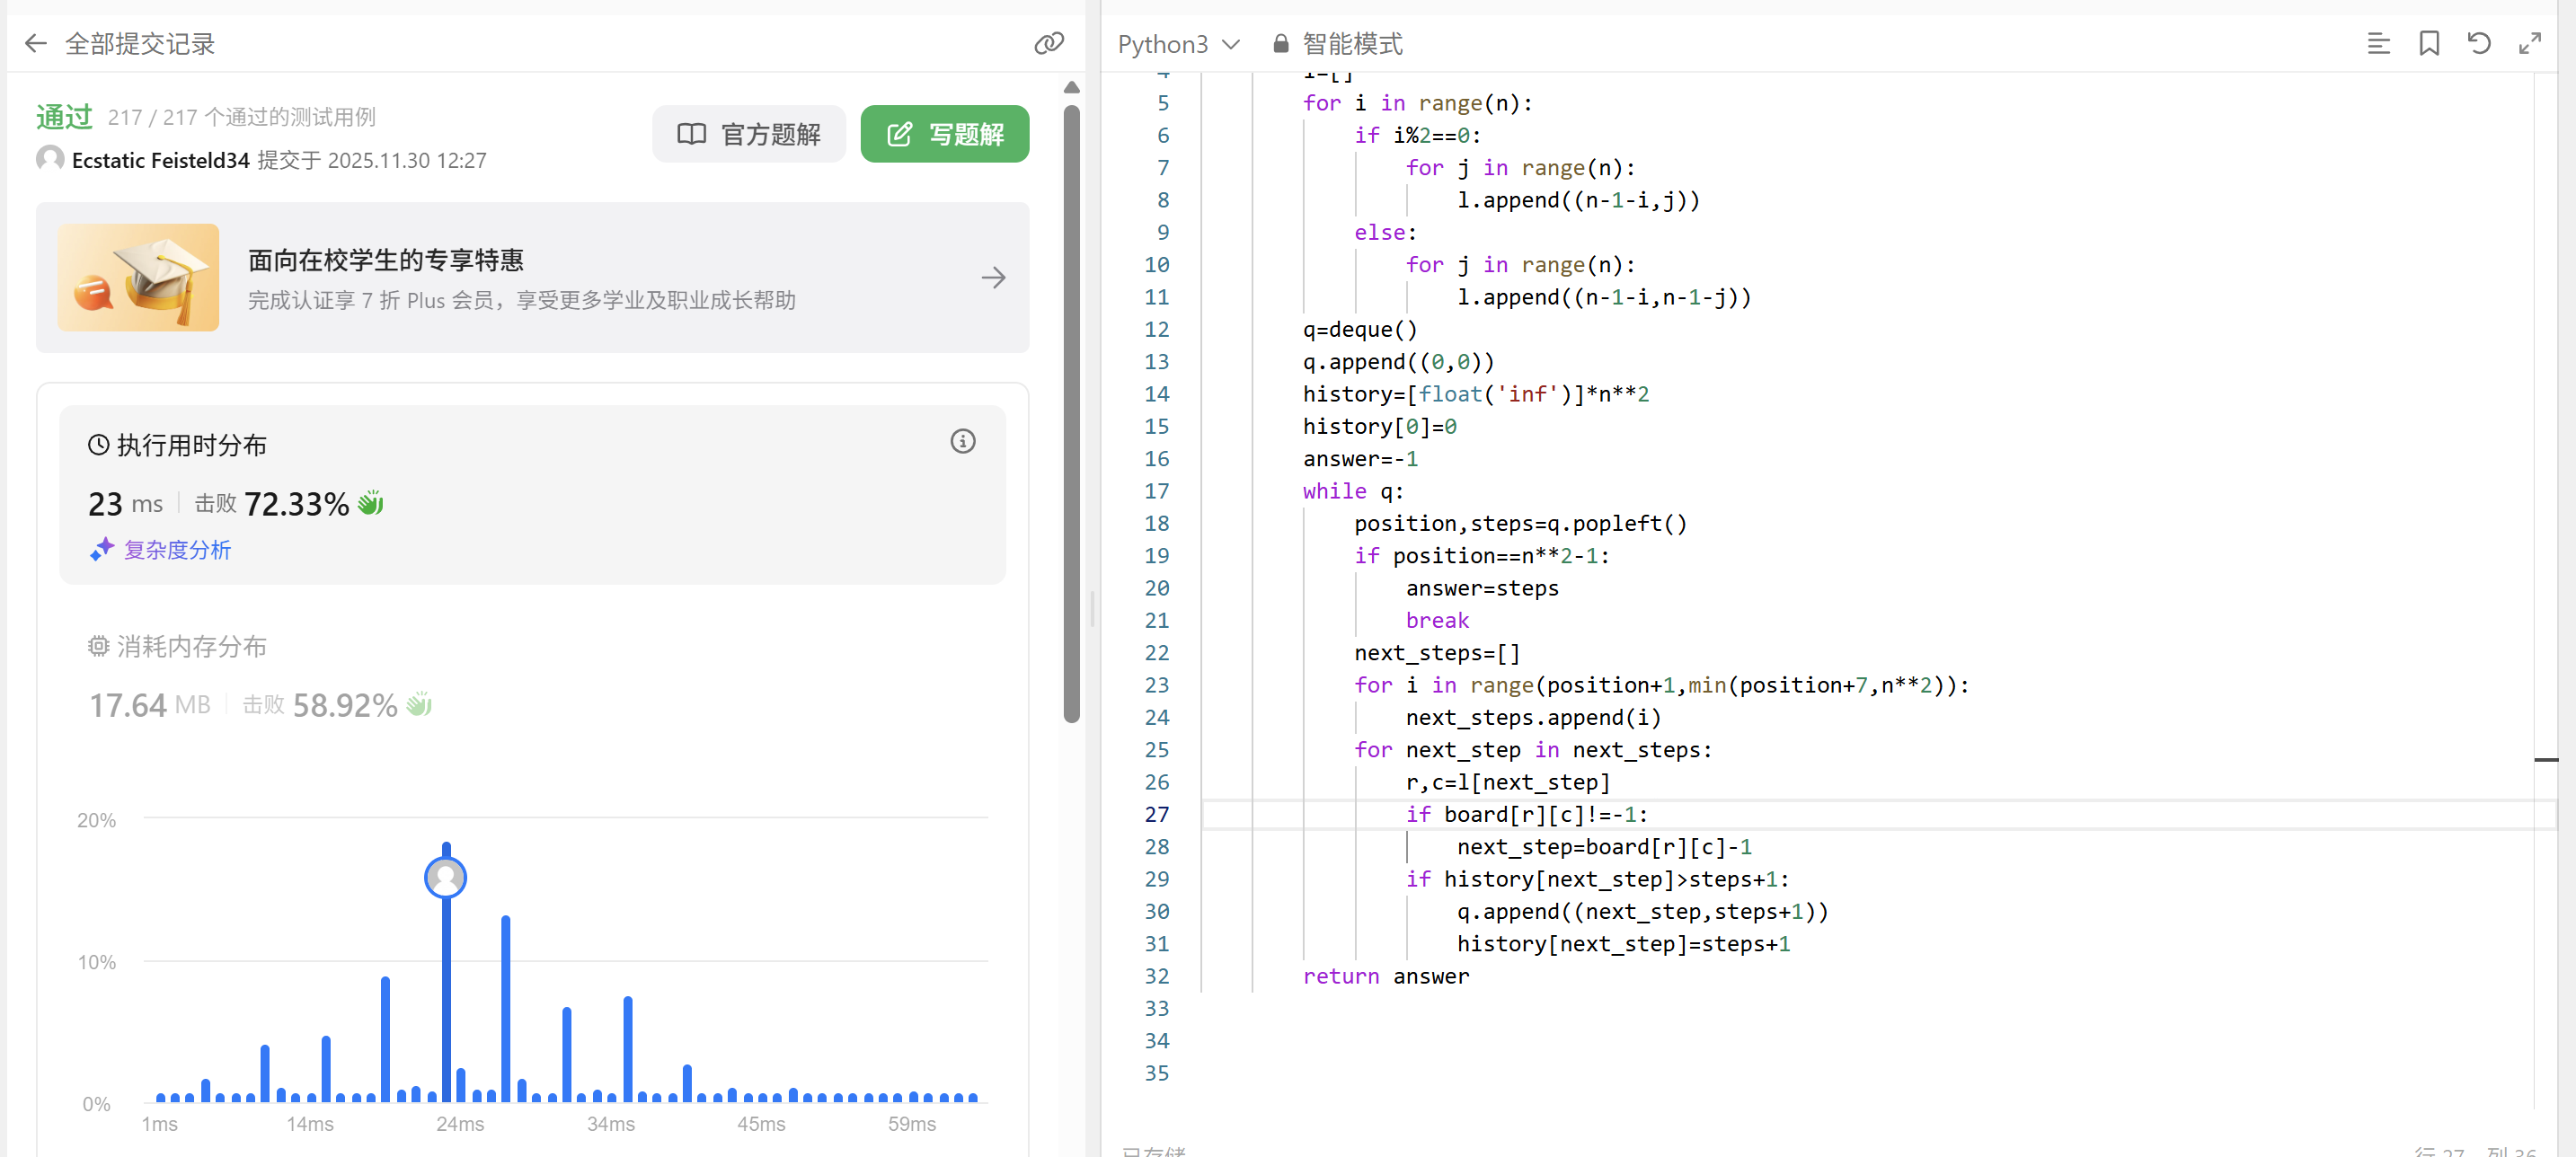




### sy382: 有向图判环 中等

dfs, topological sort, https://sunnywhy.com/sfbj/10/3/382


思路：
我对每一个有向线段起点都进行bfs，并用path字典记录避免重复行走，但是复杂度可能不太好。
dfs染色法和拓扑排序法时间复杂度低，其实我的想法就是dfs染色法的意思，但是一时半会想不出怎么实现。
拓扑排序确实巧妙。

代码：
我的方法
```python
from collections import deque
dic={}
n,m=map(int,input().strip().split())
starts={}
for _ in range(m):
    u,v=map(int,input().strip().split())
    if u in dic:
        dic[u].append(v)
    else:
        dic[u]=[v]
        starts[u]=1

judge=0
for key in dic:
        path={}
        path[key]=1
        q=deque()
        q.append(key)

        while q:
            node=q.popleft()
            if node in dic:
                next_nodes=dic[node]
            else:
                 continue
            for next_node in next_nodes:
                if next_node==key:
                    judge=1
                if next_node not in path:
                    path[next_node]=1
                    q.append(next_node)
if judge:
     print("Yes")
else:
     print("No") 
```
dfs染色法

```python
from collections import defaultdict
dic=defaultdict(list)
n,m=map(int,input().strip().split())
color=[0]*n
for _ in range(m):
    u,v=map(int,input().strip().split())
    dic[u].append(v)


def dfs(node):
    if color[node]==1:
        return True
    elif color[node]==2:
        return False
    color[node]=1
    for next_node in dic[node]:
        if dfs(next_node):
            return True
    color[node]=2
    return False

judge=0
for i in range(n):
    if color[i]==0:
        if dfs(i):
            print('Yes')
            judge=1
            break
if judge==0:
    print("No")
```
拓扑排序法
```python
from collections import defaultdict,deque
n,m=map(int,input().split())
dic=defaultdict(list)
indegree=[0]*n
for i in range(m):
    u,v=map(int,input().split())
    dic[u].append(v)
    indegree[v]+=1
q=deque()
for i in range(n):
    if indegree[i]==0:
        q.append(i)
count=0
while q:
    node=q.popleft()
    count+=1
    for next_node in dic[node]:
        indegree[next_node]-=1
        if indegree[next_node]==0:
            q.append(next_node)
if count<n:
    print('Yes')
else:
    print('No')
```

代码运行截图 <mark>（至少包含有"Accepted"）</mark>
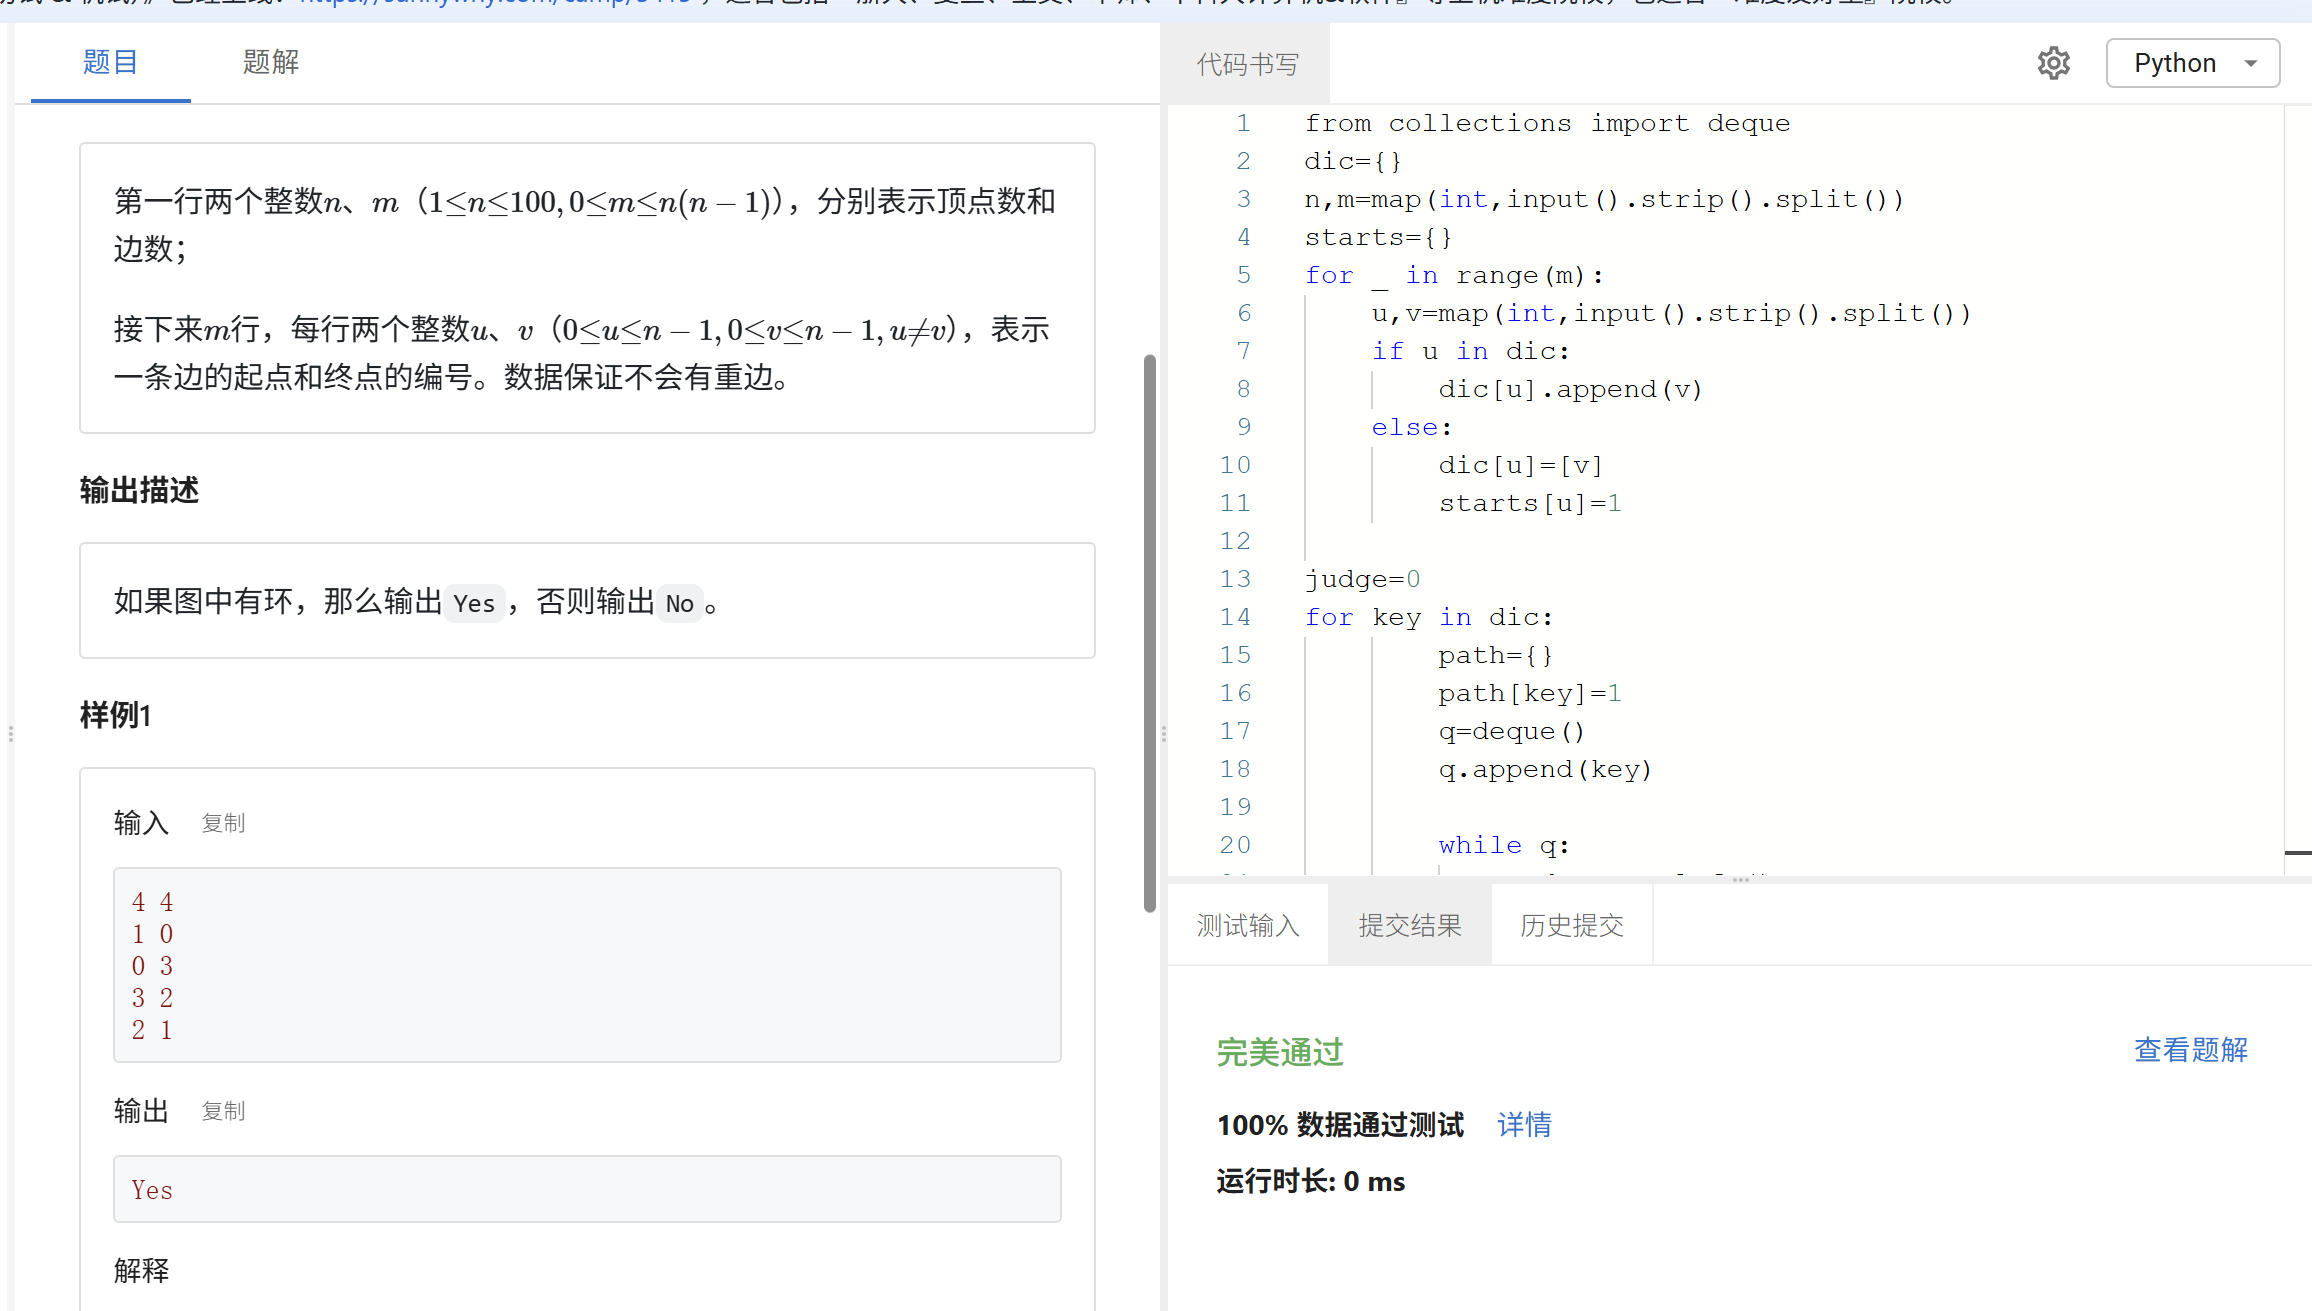




### M28046: 词梯

bfs, http://cs101.openjudge.cn/practice/28046/

思路：
一开始因为构建邻接表超时了，4*n**2复杂度会超时，只能改成先建立通配符对应单词的字典，然后对每一个单词的通配符在这个字典里取出与其不同的单词，组成邻接表，这样复杂度就成了n*k*4


代码：

```python
from collections import defaultdict,deque
n=int(input().strip())

words=[]
for i in range(n):
    words.append(input().strip())
start,end=input().strip().split()


pattern_map=defaultdict(list)
for word in words:
    for i in range(4):
        pattern=word[:i]+'*'+word[i+1:]
        pattern_map[pattern].append(word)
graph=defaultdict(list)
for word in words:
    neighbors=set()
    for i in range(4):
        pattern=word[:i]+'*'+word[i+1:]
        for neighbor in pattern_map[pattern]:
            if neighbor!=word:
                neighbors.add(neighbor)
    graph[word]=list(neighbors)

history={}
for word in words:
    history[word]=float('inf')
q=deque()
q.append((start,[start],0))
judge=0
while q:
    word,path,steps=q.popleft()
    if word==end:
        judge=1
        break
    for next_word in graph[word]:
        if steps+1<history[next_word]:
            history[next_word]=steps+1
            q.append((next_word,path+[next_word],steps+1))
if judge:
    print(*path)
else:
    print('NO') 
```



代码运行截图 <mark>（至少包含有"Accepted"）</mark>
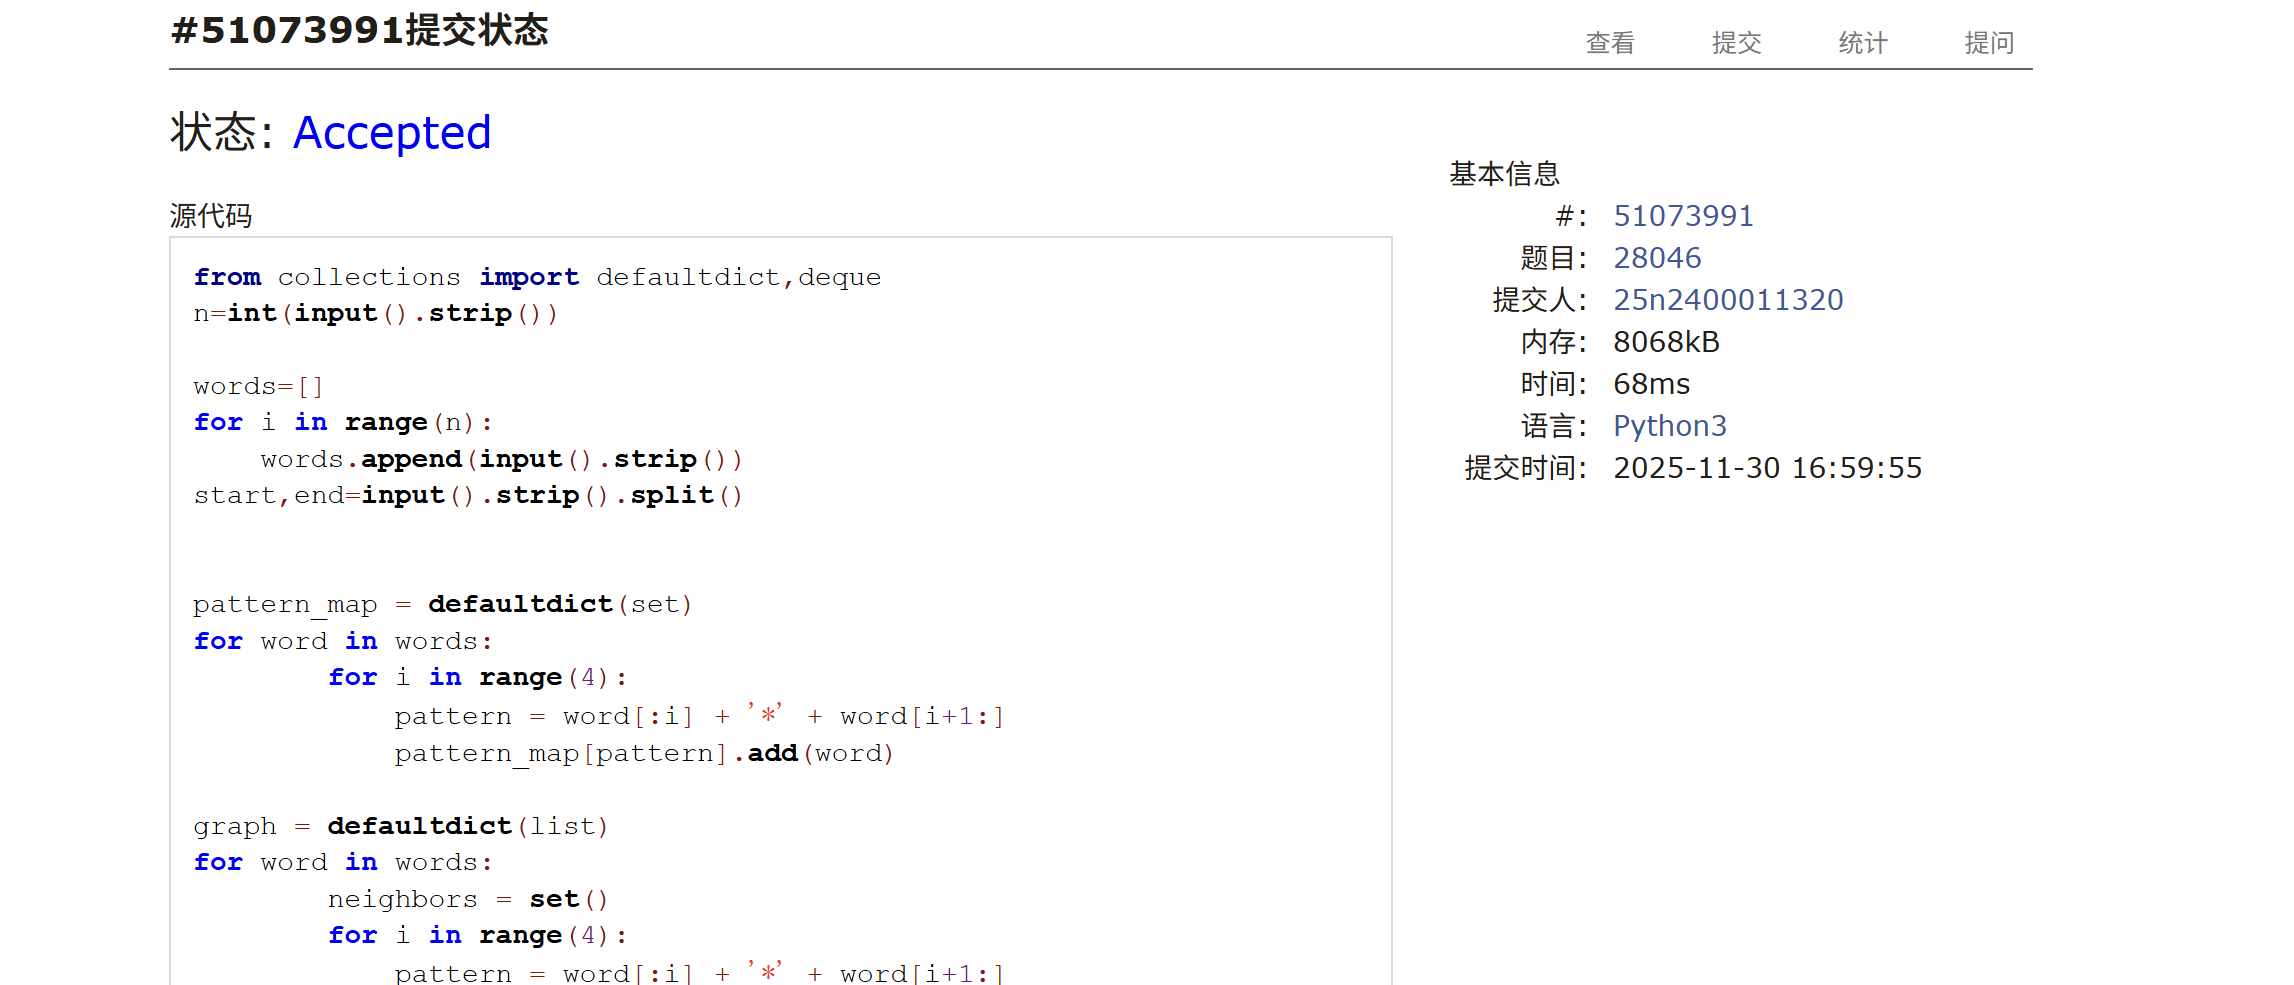




### M433.最小基因变化

bfs, https://leetcode.cn/problems/minimum-genetic-mutation/

思路：
和上一题几乎没有任何区别
然后看了一下标答方法，其实就是把构造邻接表的过程直接融合到bfs中，值得注意的是，标答通过将bank转为set的形式，使得第二次查找变为O1复杂度，本质上和我的方法差不多。

代码

```python
class Solution:
    def minMutation(self, startGene: str, endGene: str, bank: List[str]) -> int:
        pattern_map=defaultdict(list)
        bank.append(startGene)
        for gene in bank:
            for i in range(8):
                pattern=gene[:i]+'*'+gene[i+1:]
                pattern_map[pattern].append(gene)
        graph=defaultdict(list)
        for gene in bank:
            for i in range(8):
                pattern=gene[:i]+'*'+gene[i+1:]
                for neighbor in pattern_map[pattern]:
                    if neighbor!=gene:
                        graph[gene].append(neighbor)

        q=deque()
        q.append((startGene,0))
        history={}
        for gene in bank:
            history[gene]=float('inf')
        history[startGene]=0
        while q:
            gene,steps=q.popleft()
            if gene==endGene:
                return steps
            for neighbor in graph[gene]:
                if steps+1<history[neighbor]:
                    history[neighbor]=steps+1
                    q.append((neighbor,steps+1))

        return -1
```



代码运行截图<mark>（至少包含有"Accepted"）</mark>
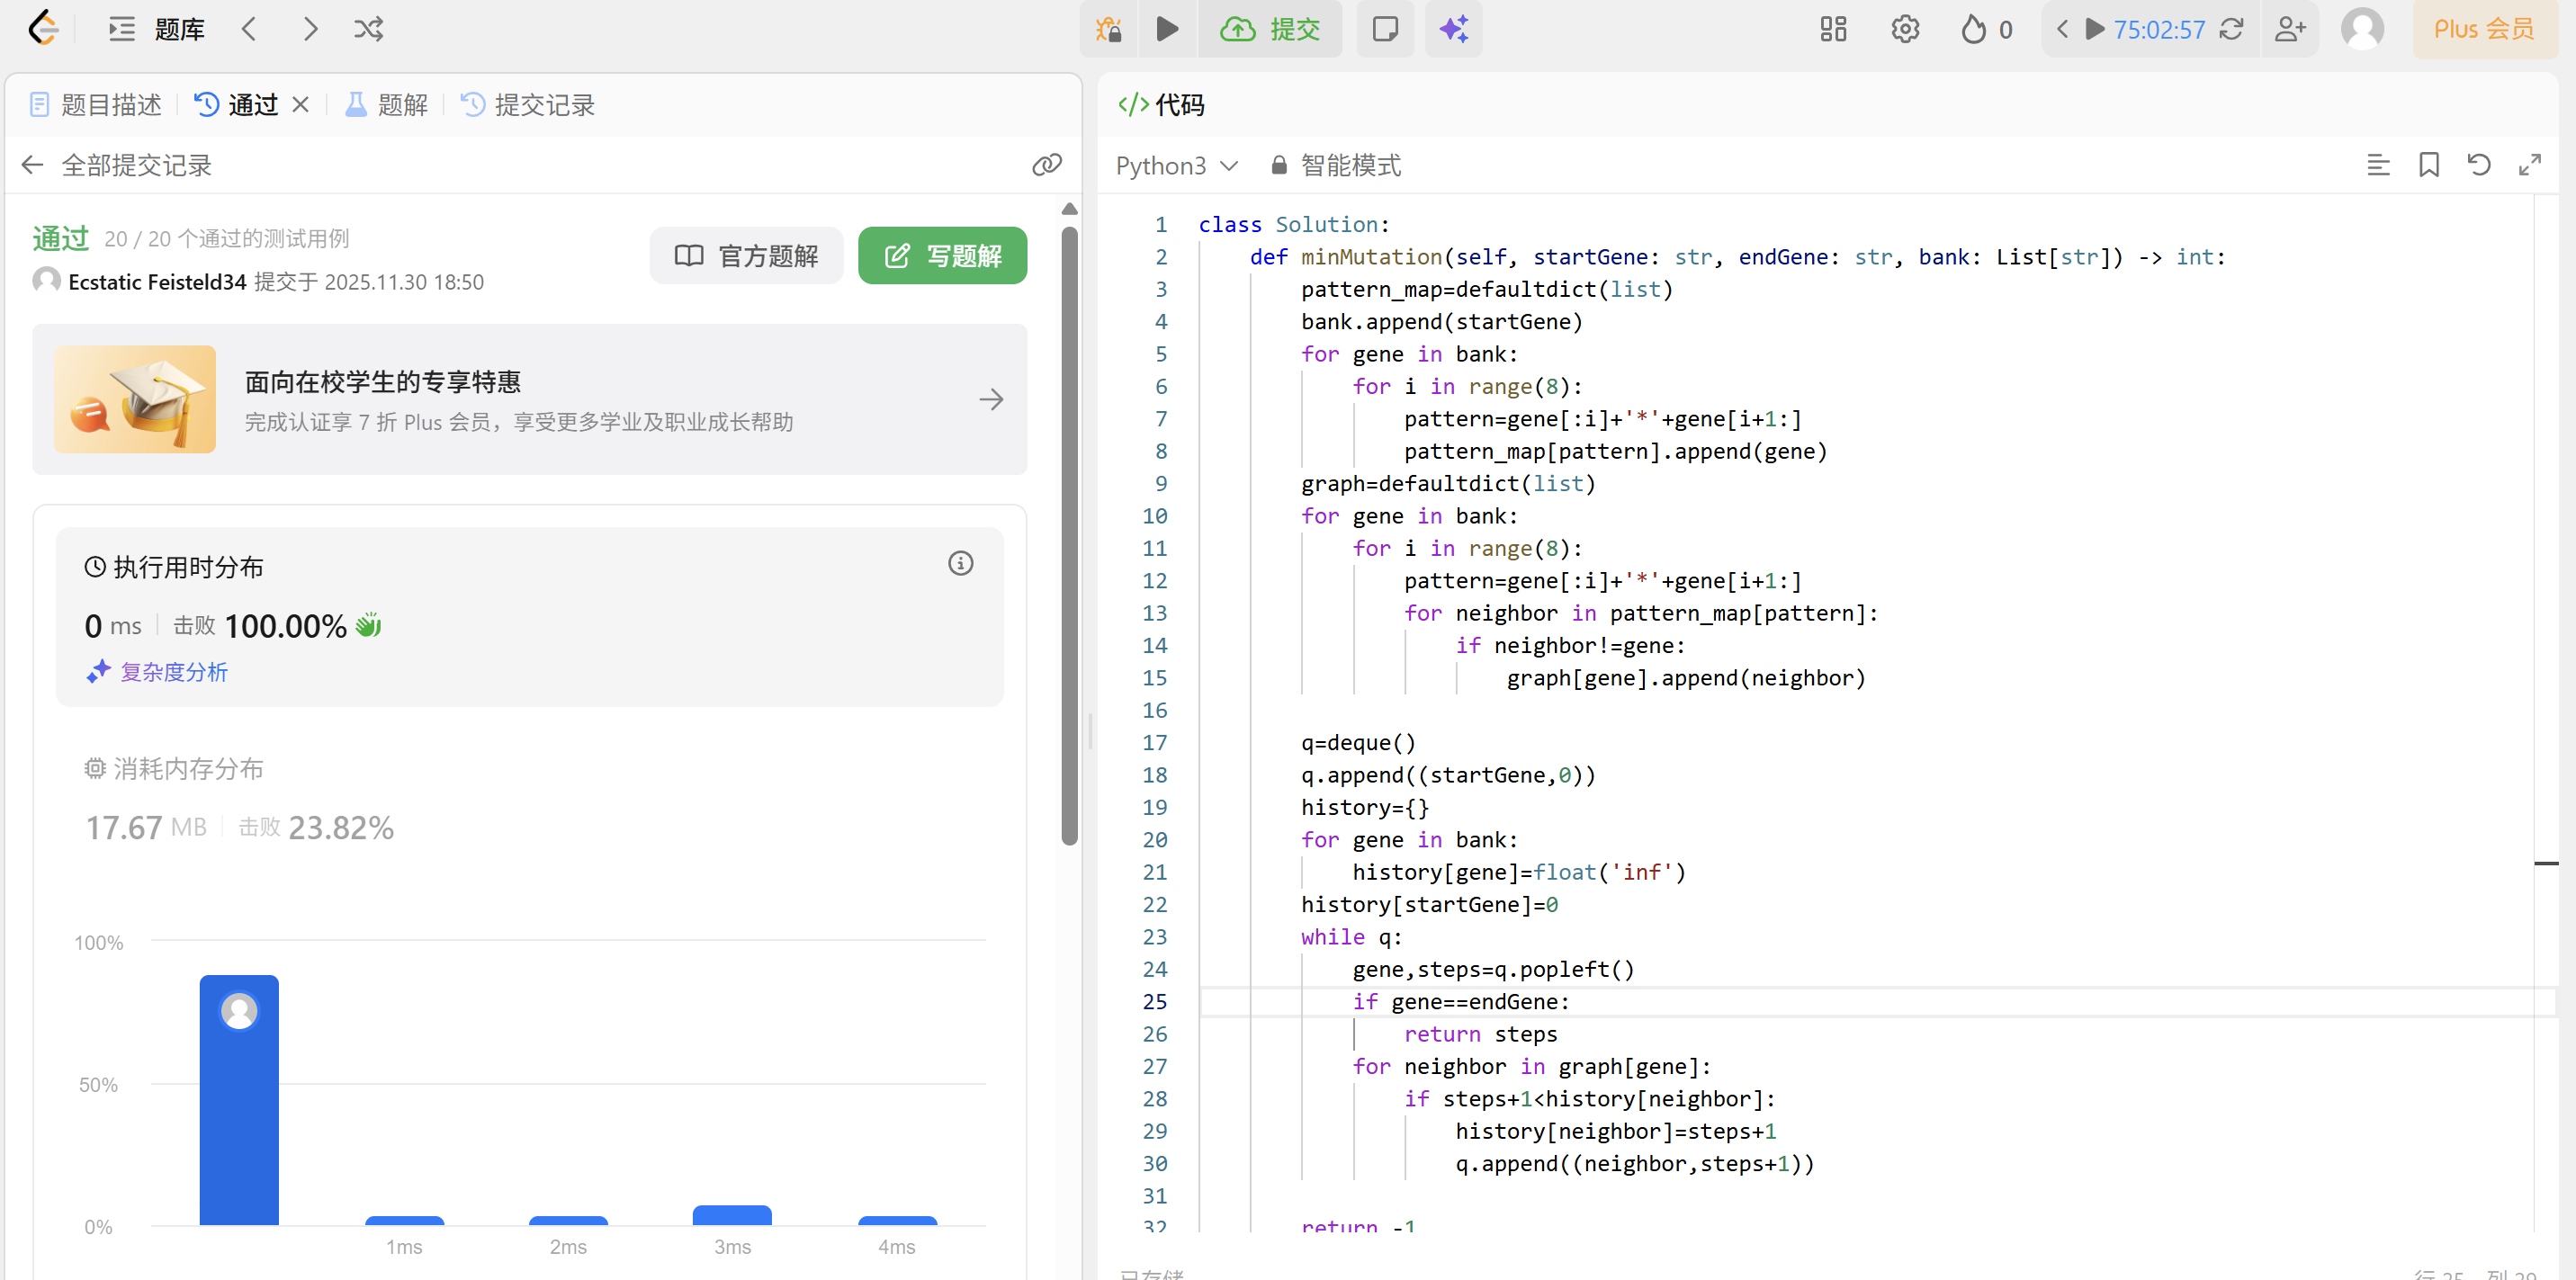




### M05443: 兔子与樱花

Dijkstra, http://cs101.openjudge.cn/practice/05443/

思路：



代码

```python

```



代码运行截图<mark>（至少包含有"Accepted"）</mark>





### M28050: 骑士周游

dfs, http://cs101.openjudge.cn/practice/28050/

思路：
使用启发式搜索减少用时


代码：

```python
from  collections import deque
n=int(input())
sr,sc=map(int,input().strip().split())
visited=[[False]*n for _ in range(n)]
visited[sr][sc]=True

def is_valid(r,c):
    if 0<=r<n and 0<=c<n and not visited[r][c]:
        return True
    return False

def next_steps(r,c):
    moves=[[-2,+1],[-2,-1],[-1,+2],[-1,-2],
            [+1,+2],[+1,-2],[+2,+1],[+2,-1]]
    l=[]
    for dr,dc in moves:
        nr,nc=r+dr,c+dc
        if is_valid(nr,nc):
            count=0
            for ndr,ndc in moves:
                nnr,nnc=nr+ndr,nc+ndc
                if is_valid(nnr,nnc):
                    count+=1
            l.append([nr,nc,count])
    l.sort(key=lambda x:x[2])
    return [[r,c] for r,c,count in l]

def dfs(r,c,number):
    if number==n**2:
        return True
    for nr,nc in next_steps(r,c):
        if is_valid(nr,nc):
            visited[nr][nc]=True
            if dfs(nr,nc,number+1):
                return True
            visited[nr][nc]=False
    return False

if dfs(sr,sc,1):
    print('success')
else:
    print('fail')
```



代码运行截图 <mark>（至少包含有"Accepted"）</mark>
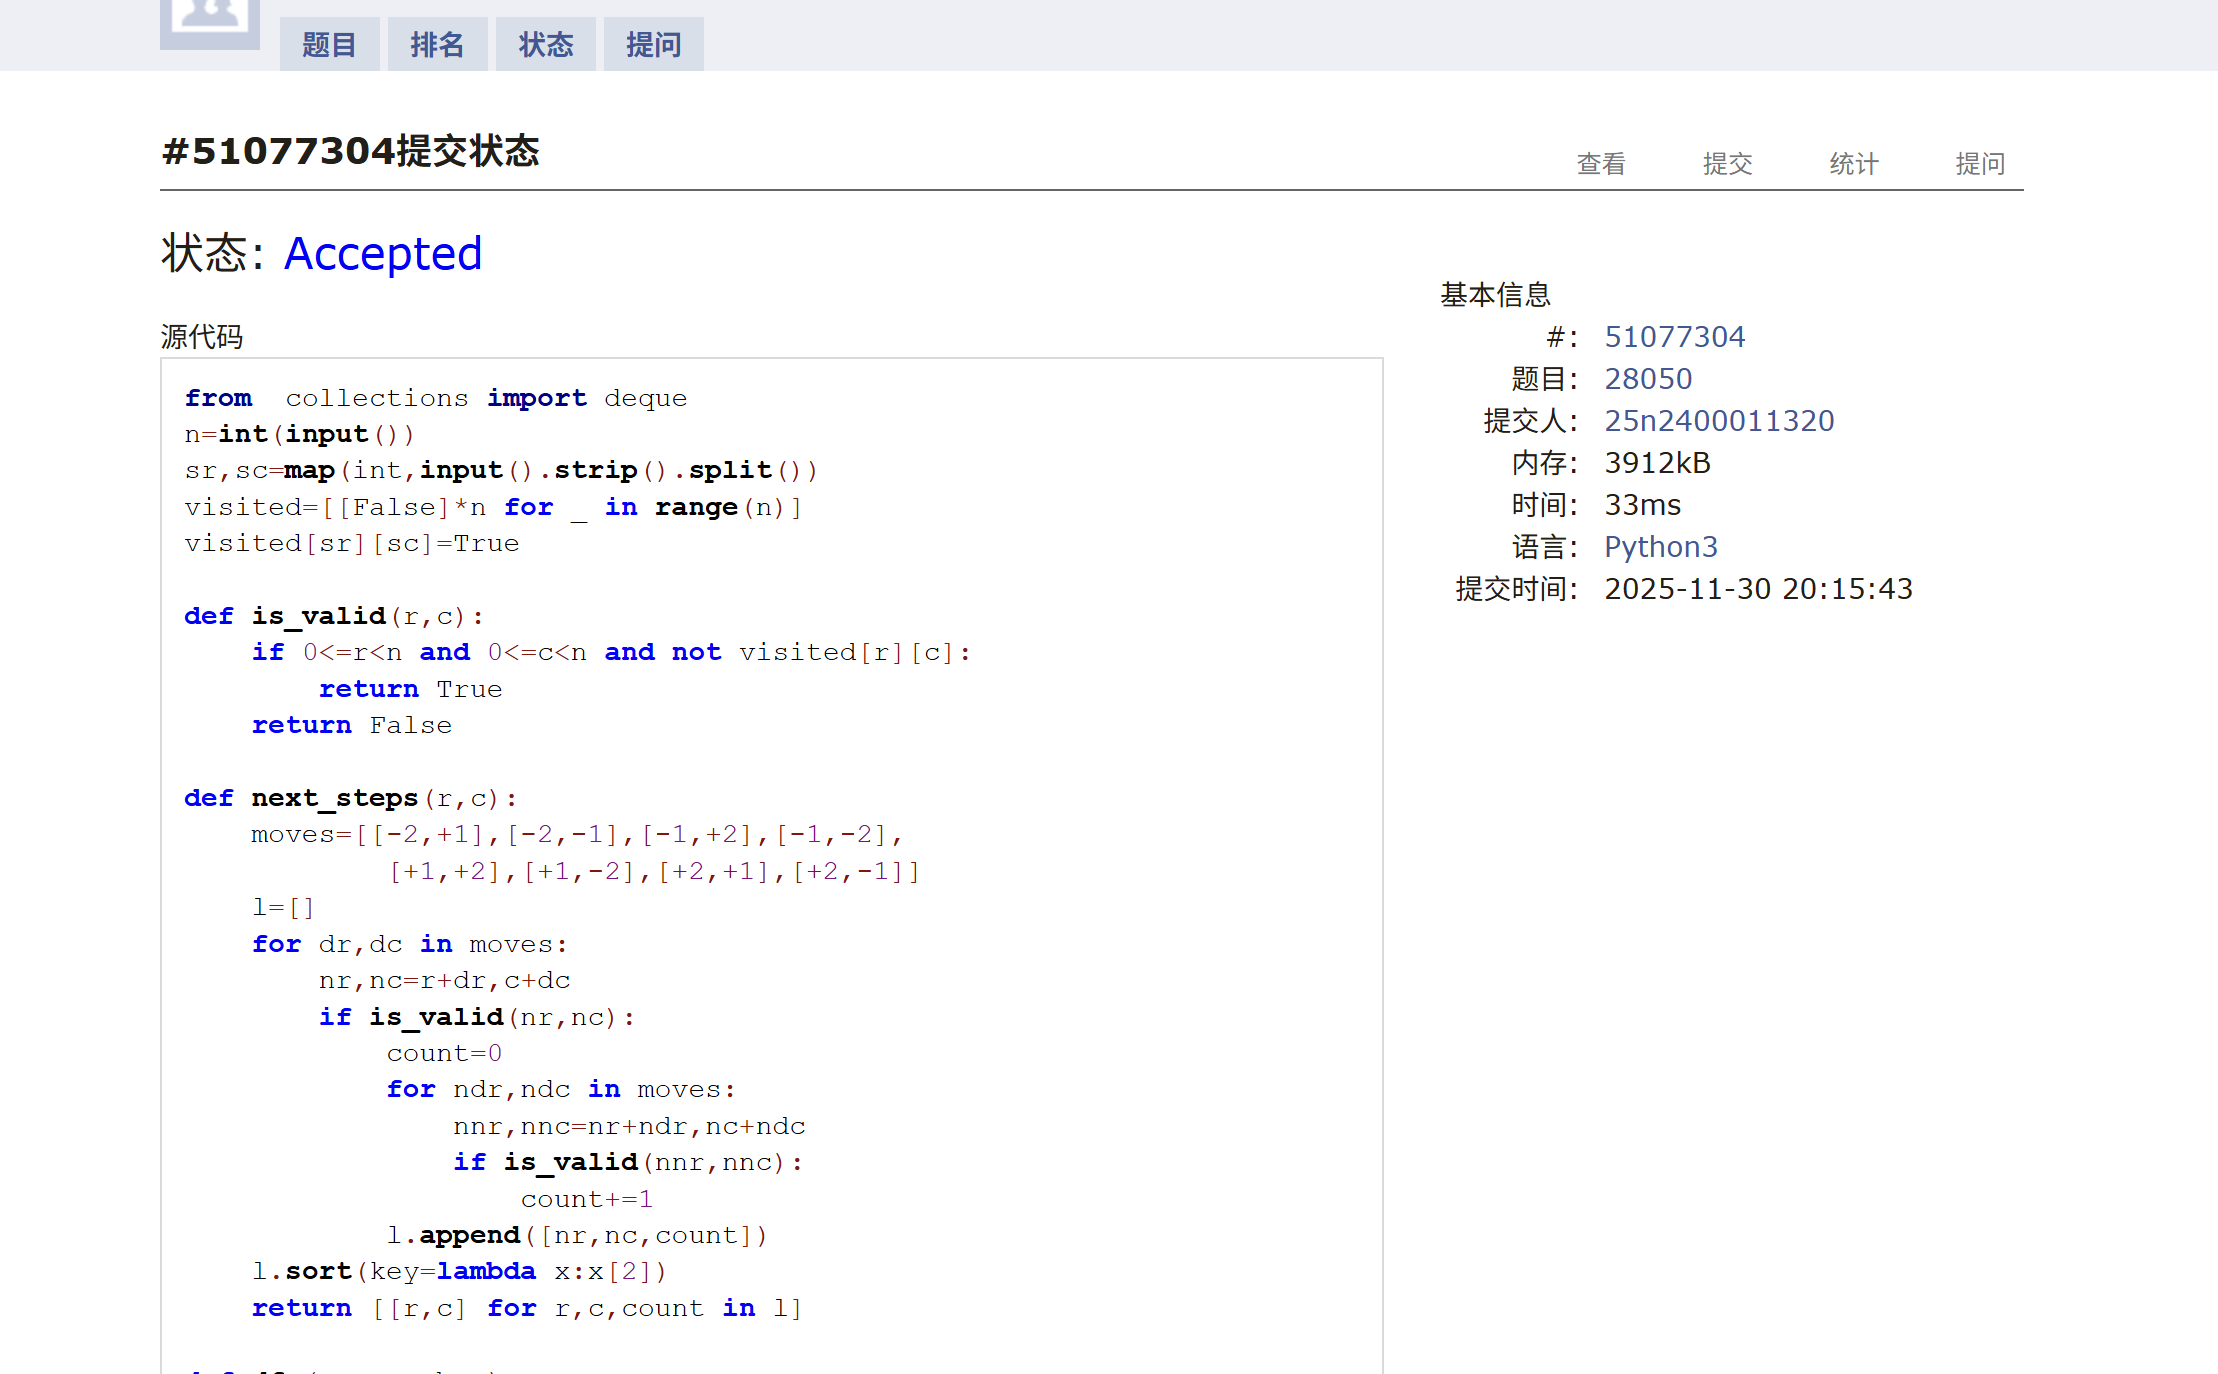


## 2. 学习总结和个人收获

蛇梯棋一开始范围后一个数忘了加1，导致debug了很久，说明一眼能看出做法不代表做的时候大脑可以休息，仍然要注意每一处的含义，不然出错就要debug很久。
对于邻接表，可以使用通配符加字典的方式减小复杂度。




